# Le Classifieur SVM Classifier pour des donn√©es non-s√©parables

In [125]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
# Import usual libraries
import numpy as np
import matplotlib.pyplot as plt

# Make all figures tiny for readability purpose
from matplotlib import rcParams
rcParams['figure.figsize'] = (5,3)

## 1. Construisons notre "XOR" dataset

Essayer de classifier un dataset lin√©airement non s√©parable


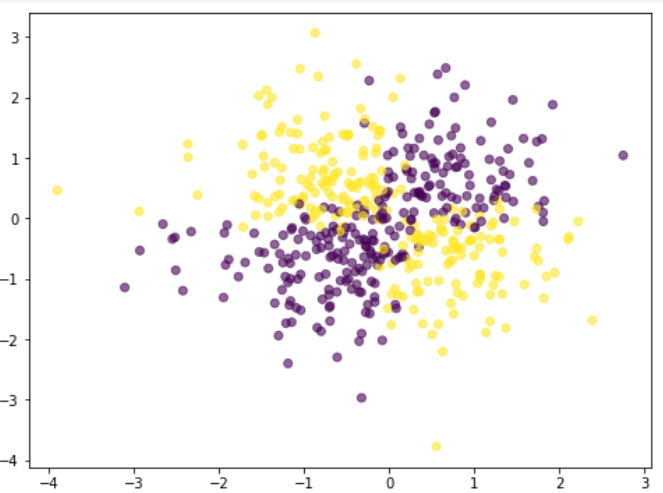


Pour cela, nous allons cr√©er un ensemble de donn√©es 2D en utilisant des [portes XOR logiques](https://en.wikipedia.org/wiki/XOR_gate)

Essayez de comprendre comment cela fonctionne en jouant avec `np.logical_xor` dans les cellules ci-dessous¬†:

In [127]:
# Si on a deux valeurs semblable, alors cela renvoie False sinon True

print(np.logical_xor(True, True))
print(np.logical_xor(True, False))
print(np.logical_xor(False, False))
print(np.logical_xor(False, True))

False
True
False
True


In [128]:
print(np.logical_xor([True, True, False, False], [True, False, False, True]))

[False  True False  True]


Cr√©aons notre propre jeu de donn√©es 2D synth√©tiques o√π:

$$ y =
\begin{cases}
    1 & \text{if } (X_1>0 \textbf{ xor } X_2>0) \\
    0 & \text{otherwise}
\end{cases}
$$


In [129]:
# Number of datapoints
n = 500
noise = 0.2

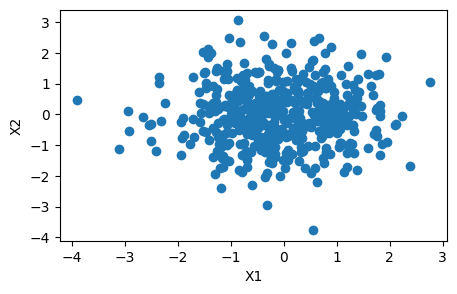

In [130]:
rng = np.random.default_rng(0)
X = rng.standard_normal((n, 2))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


In [131]:
print(X.shape)
x1 = X[:, 0]
x2 = X[:, 1]

(500, 2)


In [132]:
# Then, build our binary class y
# where y=1 if and only if (X1 > Œµ xor X2 > Œµ)
# epsilon Œµ not exactly zero to simulate "noise"

epsilon = noise * rng.standard_normal(n)

y_bool = np.logical_xor(
    x1 > epsilon,
    x2 > epsilon
)
y = np.where(y_bool, 1, 0)
print(y)

[0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1
 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0
 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0
 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1
 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0
 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1
 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0
 1 1 1 0 0 0 1 0 0 1 0 1 

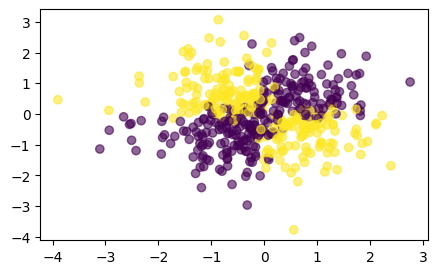

In [133]:
# We have re-created the XOR quadrant!
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6)
plt.show()

## 2 - Linear SVM

_Support Vector Machine (SVM)_ üéâ

Le classifieur SVM lin√©aire a pour but de trouver the meilleur vecteur  **w**

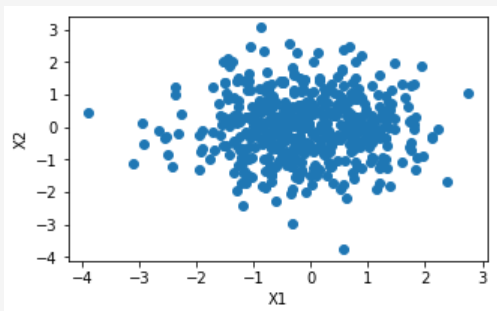

- dont la direction d√©termine de mani√®re unique l'hyperplan de la fronti√®re de d√©cision
- et minimise la somme des pertes 'hinge' pour les valeurs aberrantes

üëâ **w** contient tous les param√™tres appris pendant l'apprentissage `.fit()`  
üëâ `C` est le **co√ªt** associ√© avec la **mauvaise** classification

___
‚ùì Fit un **linear** classifieur SVC classifier sur le dataset complet avec la valeur  `C` = 1.

In [134]:
from sklearn.svm import SVC
C=1
model = SVC(C=1, kernel="linear")

model.fit(X,y)

SVC(C=1, kernel='linear')

[texte du lien](https://)‚ùì Visualise la fronti√®re de d√©cision du mod√®le en utilisant la fonction `plot_decision_regions` donn√©e dans `utils/plots.py`

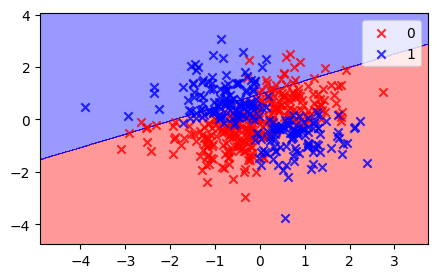

In [135]:
from plots import plot_decision_regions
linear_decision = plot_decision_regions(X,y, model)

‚ùìEnregistrez ci-dessous votre score de pr√©cision ¬´ estim√© ¬ª pour ce mod√®le (environ)


In [136]:
linear_svm_score = model.score(X, y)

In [137]:
linear_svm_score

0.618



‚ùì Pensez-vous que la valeur de ¬´¬†C¬†¬ª a une importance dans ce cas¬†?


R√©ponse : Non car la valeure par d√©faut est d√©j√† 1

## 3.2 Kernels

Un 'kernel' de d√©gr√®s 2 est de la forme suivante:

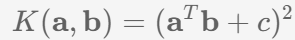

En changeant le noyau, nous avons chang√© notre notion de _similarit√©_¬†: au lieu de mesurer la similarit√© en fonction de la proximit√© des points en termes de produit scalaire (¬´¬†similarit√© cosinus¬†¬ª) pour le noyau lin√©aire, nous mesurons la similarit√© en fonction **du fait que les points sont ou non dans un cercle.**

C'est √©quivalent √† cr√©er des caract√©ristiques quadratiques comme en dessous :
---
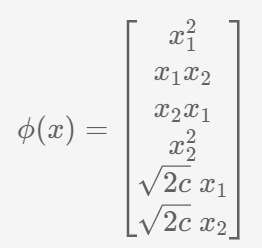

‚ùìIntuitivement parlant, quel est selon vous le nombre minimum de ¬´ degr√©s ¬ª de noyau ¬´ d ¬ª dont nous avons besoin pour adapter au mieux notre ensemble de donn√©es XOR ?




R√©ponse : Je pense qu'il faudrait au moins 51%

‚ùìAjustez et tracez un ¬´ poly ¬ª SVM de degr√© 2, en gardant ¬´ C = 100 ¬ª suffisamment grand pour visualiser le ¬´ classificateur de marge maximale ¬ª

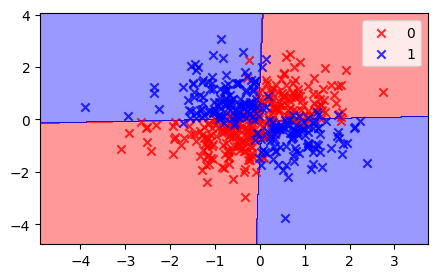

In [138]:
SVM_degres_2 = SVC(kernel='poly', degree=2, C=100)
model_degres = SVM_degres_2.fit(X, y)
plot_decision_regions(X,y, model_degres)

In [139]:
model_degres.score(X, y)

0.894

‚ùì√âtant donn√© que vous savez comment cet ensemble de donn√©es XOR a √©t√© con√ßu, quels adjectifs d√©crivent le mieux les performances de votre SVM¬†?

In [140]:
a = "is underfitting"
b = "captures all reducible error"
c = "has too high variance"
d = "has only irreducible errors left"

poly_svm_performance = d


‚ùì Toujours pas convaincu ? Vous pouvez v√©rifier que le noyau polynomial √©quivaut √† avoir acc√®s aux fonctionnalit√©s polynomiales en ajustant ce mod√®le ci-dessous¬†:

- Nous cr√©ons des fonctionnalit√©s polynomiales dans un premier temps (ing√©nierie des fonctionnalit√©s)
- puis nous ajustons un SVM lin√©aire.


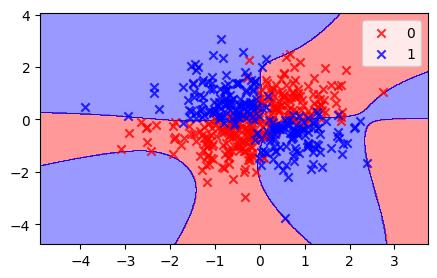

In [141]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Choose your degree
degree = 5

equivalent_polynomial_model = make_pipeline(
    (PolynomialFeatures(degree=degree)),  # First, create all polynomial combinations of your features
    (SVC(kernel="linear", C=100))  # Then, fit a linear SVM
)
equivalent_polynomial_model.fit(X, y)
plot_decision_regions(X, y, classifier=equivalent_polynomial_model)

‚òùÔ∏è Bien que math√©matiquement √©quivalente, cette ing√©nierie manuelle des fonctionnalit√©s n√©cessite beaucoup plus de puissance de calcul que l'astuce du noyau et ne s'adaptera pas √† une dimensionnalit√© plus √©lev√©e¬†!

### Moons dataset

Essayons maintenant avec un ensemble de donn√©es plus difficile √† classer¬†!




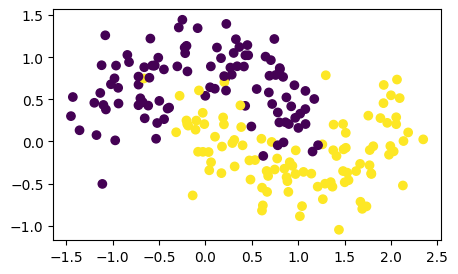

In [142]:
from sklearn.datasets import make_moons

n=200
X,y = make_moons(n_samples=n, noise=0.25, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y);

‚ùì Essayez d'adapter un noyau SVM polynomial √† cet ensemble de donn√©es

Essayez-le **visuellement** ci-dessous en modifiant les valeurs de `C` et `degree` et `coef0`.

`coef0` joue le r√¥le de $c$ dans $K(\textbf{a},\textbf{b}) = (\textbf{a}^T\textbf{b} + c )^d$
- Lorsqu'il est √©gal √† 0, vous n'avez acc√®s qu'aux caract√©ristiques polynomiales de degr√© d
- Plus il est √©lev√©, plus votre mod√®le prendra en compte les caract√©ristiques de degr√© inf√©rieur

In [143]:
from ipywidgets import interact

@interact(C=[1, 10, 1000, 10000, 100000], degree=[1,2,3,4,5,6,7,8,9], coef0=[0,0.5,1,2,5,10,100])
def svc(C, degree, coef0):
    svm = SVC(kernel='poly', C=C, coef0=coef0, degree=degree)
    svm.fit(X, y)
    plot_decision_regions(X, y, classifier=svm)

interactive(children=(Dropdown(description='C', options=(1, 10, 1000, 10000, 100000), value=1), Dropdown(descr‚Ä¶

‚òùÔ∏èUn noyau polynomial peut s'adapter √† peu pr√®s √† tout, √† condition que le degr√© soit suffisamment √©lev√©.

Cependant, sachez que les noyaux polynomiaux avec un degr√© trop √©lev√© rendront les mod√®les sujets au surajustement¬†!

## 3.3 RBF - Radial Basis Function Kernel (aka gaussian)

Voici le noyau RBF¬†!
Il s'agit pratiquement du noyau de r√©f√©rence pour SVM (et celui par d√©faut dans sklearn).

Il s'av√®re tr√®s robuste face √† une vari√©t√© de probl√®mes et est plus facile √† affiner que le polyn√¥me, car il ne n√©cessite qu'une recherche par grille de son hyper-param√®tre de noyau `gamma` $\gamma$, en plus de `C` bien s√ªr

$K(\textbf{a},\textbf{b}) = \exp[ \left( - \gamma ||\textbf{a}-\textbf{b}||^2\right)$

- Plus la distance euclidienne entre deux points $||\textbf{a}-\textbf{b}||^2$ est grande, plus la fonction noyau est proche de z√©ro. Cela signifie que deux points √©loign√©s sont plus susceptibles d'√™tre diff√©rents.

- `gamma` $\gamma$ r√©duit la port√©e d'influence de chaque instance sur les autres (**myopie**). Des valeurs $\gamma$ plus fortes rendront votre mod√®le surajust√© en regardant ¬´ trop attentivement ¬ª les irr√©gularit√©s √† petite √©chelle

- `C` contr√¥le toujours la **duret√©** de la marge. Des valeurs plus fortes rendront votre mod√®le surajust√©.

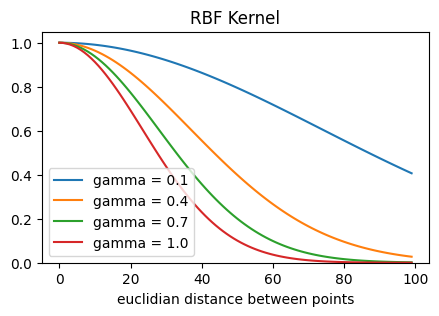

In [144]:
# Let's show below the impact of gamma "myopia" in the Kernel
for gamma in np.linspace(0.1, 1, 4):
    plt.plot(np.exp(-gamma*np.linspace(0, 3, 100)**2),
             label=f'gamma = {gamma}')
plt.ylim(0,)
plt.title('RBF Kernel')
plt.xlabel('euclidian distance between points')
plt.legend();

‚ùì Ajuster et tracer les r√©gions de d√©cision d'un classificateur SVM avec un noyau RBF

- Commencer avec un mod√®le avec une variance tr√®s faible (ex¬†: `gamma=0.01` et `C=0.1`)
- Augmenter `gamma` jusqu'√† ce que vous observiez un sur-ajustement √©vident. Il doit √™tre clairement visible sur le graphique.

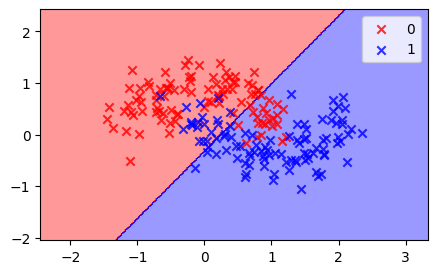

In [145]:
model = SVC(kernel='rbf', gamma=0.01, C=0.1)
model.fit(X, y)
plot_decision_regions(X, y, classifier=model)

‚ùì Maintenant, utilisez votre meilleure valeur estim√©e de gamma (par exemple ¬´¬†gamma¬†=¬†1¬†¬ª) et augmentez ¬´¬†C¬†¬ª cette fois jusqu'√† ce que vous soyez surajust√©


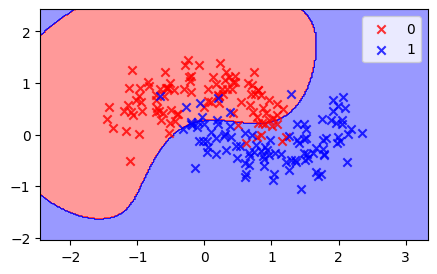

In [146]:
model = SVC(kernel='rbf', gamma=1, C=0.1)
model.fit(X, y)
plot_decision_regions(X, y, classifier=model)

‚òùÔ∏è N'h√©sitez pas √† cr√©er votre propre trac√© interactif en utilisant `@interact` comme ci-dessus et essayez de trouver ¬´ visuellement ¬ª les meilleurs ¬´ C ¬ª et ¬´ gamma ¬ª

In [147]:
from ipywidgets import interact
import ipywidgets as widgets

@interact(C=[0.1, 1, 10, 100, 1000, 10000], gamma = [0.001, 0.01, 0.1, 1, 10])
def svc(C=1, gamma=1):
    svm = SVC(kernel='rbf', gamma=gamma, C=C)
    svm.fit(X, y)
    plot_decision_regions(X, y, classifier=svm)

interactive(children=(Dropdown(description='C', index=1, options=(0.1, 1, 10, 100, 1000, 10000), value=1), Dro‚Ä¶

‚ùìStockez ci-dessous votre meilleure estimation visuelle pour C et gamma (arrondie √† des puissances de dix¬†: 0,1, 1, 10, 100...)

In [148]:
### C'est les plus pr√©cis tout en permettant de voir le mieux possible
best_c = 100 
best_gamma = 10

## 3.4 Sigmoid kernel

$K(\textbf{a},\textbf{b}) = tanh(\gamma \textbf{a}^T \textbf{b} +r)$

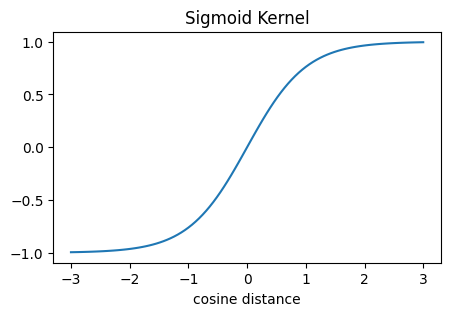

In [149]:
# The "tangent hyperbolic" function resembles sigmoid but can take negative values
x = np.linspace(-3,3,100)
plt.plot(x, np.tanh(x))
plt.xlabel('cosine distance'); plt.title('Sigmoid Kernel');

‚òùÔ∏è Le noyau sigmo√Øde compresse la ¬´ similarit√© cosinus ¬ª utilis√©e dans le noyau lin√©aire dans un intervalle [-$\gamma$,+$\gamma$].

‚ùì Essayez d'affiner **visuellement** votre mod√®le avec le noyau sigmo√Øde, en effectuant une recherche grossi√®re pour
- `C=[0.1, 1, 10, 100, 1000, 10000]`
- `gamma = [0.001, 0.01, 0.1, 1, 10]`

en utilisant le d√©corateur `@interact` combin√© avec la fonction `plot_decision_regions`

In [150]:
@interact(C=[0.1, 1, 10, 100, 1000, 10000], gamma = [0.001, 0.01, 0.1, 1, 10], coef0=0.)
def svc(C=1000, gamma=0.1, coef0=0):
    svm = SVC(kernel='sigmoid', gamma=gamma, C=C, coef0=coef0)
    svm.fit(X, y)
    plot_decision_regions(X, y, classifier=svm)

interactive(children=(Dropdown(description='C', index=4, options=(0.1, 1, 10, 100, 1000, 10000), value=1000), ‚Ä¶

‚òùÔ∏è Pas facile de le faire fonctionner visuellement, n'est-ce pas ? Il est temps d'utiliser un GridSearch automatis√© !

## 4. Grid Search le meilleur kernel

‚ùì `RandomizedSearchCV` pour le meilleur `kernel` et les meilleurs hyperparam√®tres de noyau en m√™me temps (avertissement¬†: scikit-learn a des probl√®mes lors de la recherche de grille de noyaux polynomiaux en m√™me temps que d'autres)

Utilisez vos intuitions visuelles ci-dessus pour d√©finir des plages de valeurs plausibles √† tester

In [151]:
params =[{'C' : [0.1],
         'gamma' : [1],
         'kernel': ['poly','sigmoid','linear','rbf'],}
]

In [152]:
from sklearn.model_selection import RandomizedSearchCV
best_kernel = SVC()
best_kernel = RandomizedSearchCV(best_kernel,param_distributions=params )
best_kernel.fit(X, y)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions=[{'C': [0.1], 'gamma': [1],
                                         'kernel': ['poly', 'sigmoid', 'linear',
                                                    'rbf']}])

‚ùì Tracez les limites de d√©cision de votre meilleur mod√®le

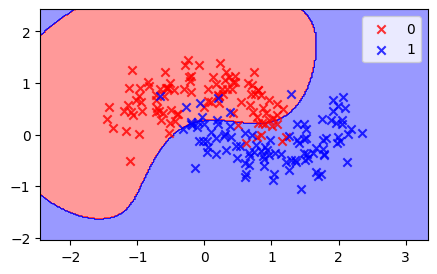

In [153]:
plot_decision_regions(X, y, classifier=best_kernel)

‚ùì Validez sa pr√©cision en 5 √©tapes et stockez votre r√©sultat moyen sous le nom ¬´¬†best_svm_cv_accuracy¬†¬ª

In [154]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_kernel, X, y, cv=5)
print(scores)
best_svm_cv_accuracy = max(scores)
print(best_svm_cv_accuracy)

[0.9   0.925 0.875 0.825 0.975]
0.975


## 5. Generalisation

Apr√®s quelques jours, le mod√®le a re√ßu et pr√©dit de nouveaux points de donn√©es qu'il n'avait jamais vus auparavant (notre ¬´ ensemble de test ¬ª)

In [155]:
# Generate a half-moon test_set of size n_test
n_test = 100
X_test, y_test = make_moons(n_samples=n, noise=0.2, random_state=1)

X_full = np.vstack((X, X_test))
y_full = np.append(y, values = y_test)
test_idx = np.arange(n,n+n_test)

‚ùì Visualisez ses performances en ex√©cutant `plot_decision_regions` en incluant `test_idx` comme argument optionnel.
Comptez le nombre d'√©chantillons de test mal class√©s que vous obtenez¬†!

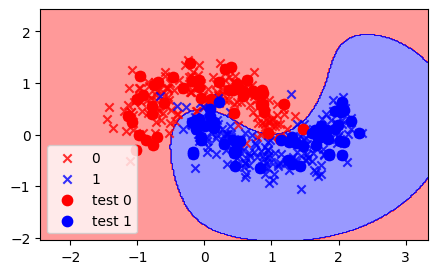

In [156]:
plot_decision_regions(X_full, y_full, classifier=SVC().fit(X_test,y_test),test_idx=test_idx)
number_misclassified_test = "Je dirais environ 18"

## 6. kNN vs. SVM ?

Un tel probl√®me non lin√©aire pourrait √©galement s'adapter √† un classificateur KNN.

Essayez de trouver le meilleur K visuellement et comparez son comportement √† celui du SVM.

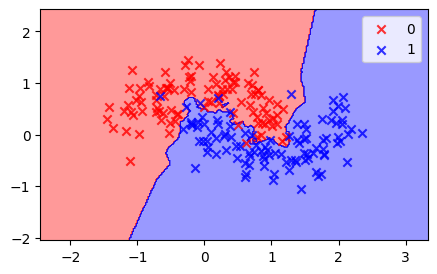

In [157]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = KNeighborsClassifier(n_neighbors=3)
neighbors.fit(X,y)

plot_decision_regions(X, y, classifier=neighbors)
# n = 3 is the more efficient


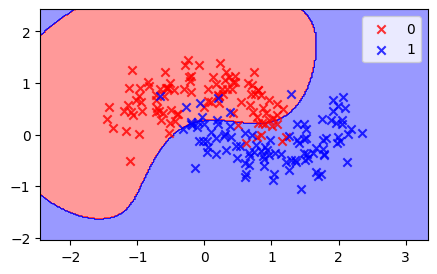

In [158]:
# We just rewrite this to ensure this is the best
from sklearn.model_selection import RandomizedSearchCV
best_kernel_1= SVC()
best_kernel_1 = RandomizedSearchCV(best_kernel_1,param_distributions=params )
best_kernel_1.fit(X, y)

plot_decision_regions(X, y, classifier=best_kernel_1)

In [162]:
print(best_kernel_1.score(X,y))
print(neighbors.score(X,y))

0.91
0.955


*For my case, the most efficient is the neighbors*

üèÅ F√©licitations ! N'oubliez pas d'**envoyer** le carnet sur Moodle !
